# Analysis of Median-Finding Algorithms and Order Statistics
### Summary
Computation of medians is a continuous necessity in various fields such as Mathematics and Computer Science. Generation of large amounts of data in the system leaves users to moderm machines on number crunching including median computation. In this analysis, we would analyze the time complexity of recursive median-finding algorithms that differs on its grouping process. In addition, we would also compare its compiled counterparts to effectively visualize the running time of the algorithms on low-level languages.

### Limitations
The following analysis involves time-measuring packages. Such functions only uses the CPU time thus its time recorded being relative. This implies that re-running of the analysis on a different system with different specification yield different results.

Additionally, the implementation of each function were integrated through `numpy` which is a python module that optimizes array operations to shorten running times and the analysis no longer covers on time complexity of algorithms purely written in base python.

Last, the random number generation for creating dummy arrays for median-finding algorithms uses `Int8` data type (integers from -128 to 127). This resolution is for the purpose of minimization of memory usage and allocation to support running on low-end computers. However, such limit affects the observed times and could produce inconsistent results of running times upon applying to real-world data (which usually uses `Int32` or higher). It is then recommended for allocating higher integer types on future analysis.

## Data Preprocessing

For this notebook, there are certain python files that were not used for this presentation. As such, the following analysis requires the following python packages:

- numpy
- pandas
- matplotlib
- seaborn
- numba
- tqdm

Other python packages that were used are present by default including

- time
- functools

Some imports given below are not part of the python packages, but a series of python files containing user-defined functions. To avoid futher errors, clone this repository and run the notebook.

In [1]:
# these .py files should be in the same directory
import algo
import test
import statplot as sp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_style('whitegrid')

## Algorithm Details

Most median-finding algorithms involves sorting the given array and retrieve the $i^{th}$ element of the array through array indexing. However, the time complexity of this process is dependent on the sorting array used. Modern sorting algorithms only has at most $O(n \log{n})$ complexity, with array indexing at $O(1)$ complexity.

In this case however, the algorithm shown above does not fully depend on the sorting algorithm but partitions the array by moving its elements based from its computed pivot (moving to the left or right position of the pivot if the number is less than or greater than the pivot respectively) and recurses on itself until it finds its given median (or other number). Pivoting and its time complexity would vary depending on the splitting process to specified number of elements (3, 5, or 7).

In theory, the best time complexity of the algorithm would be $O(n)$ provided that the number of elements per group would be 5 or greater. The following proof is as follows.

The time complexity of dividing, pivot-finding, and partitioning the array given the pivot would take $T\left(\frac{n}{k}\right) + O(n)$ time where $T\left(\frac{n}{k}\right)$ represents the time complexity of dividing the array by $k$ number of elements and retrieing it's candidate median (pivot) and $O(n)$ representing the complexity of the partitioning process. Previous knowledge of the algorithm would know that there are $\frac{n}{2k}$ elements that are certainly lower than the pivot and would factor out known elements from the pivot find process, leaving $\frac{(3k-1)n}{4k}$ elements. This would be then applied through recusion to find the median on that set of elements.

Finding the median of $k$ elements has a complexity of $O(1)$ **provided** that $k$ is sufficiently small.

With the consideration of recursion, the time complexity of the algorithm is:

$$T\left(\frac{n}{k}\right) + T\left(\frac{(3k-1)n}{4k}\right) + O(n)$$

The master theorem shows that the recurrence equation above is equal to $O(n)$ provided that $k$ is 5 or greater. When $k$ is equal to 3, the recurrence equation would be then:

$$T\left(\frac{n}{3}\right) + T\left(\frac{2n}{3}\right) + O(n)$$

With its recurrence equal to $O(n \log n)$ through master theorem.

In [2]:
algo.recurse_median??

Signature: algo.recurse_median(arr, i=None, sep=5)
Docstring: <no docstring>
Source:   
def recurse_median(arr, i=None, sep=5):
    if arr.size == 0:
        return 0
    if i is None:
        i = int(np.ceil(arr.size/2)-1)
    if arr.size <= sep:
        return np.sort(arr, kind='mergesort')[i]

    part_ind = np.arange(sep, arr.size, sep)
    sublists = np.split(arr, part_ind)
    medians = np.array([recurse_median(sublist, sep=sep)
                        for sublist in sublists])

    pivot = recurse_median(medians, sep=sep)
    ref_pivot = np.nonzero(arr == pivot)[0][0]
    arr = np.delete(arr, ref_pivot)

    ind_pivot = np.nonzero(arr <= pivot)[0].size
    if i < ind_pivot:
        sub = arr[arr <= pivot]
        return recurse_median(sub, i, sep=sep)
    elif i > ind_pivot:
        sub = arr[arr > pivot]
        return recurse_median(sub, i-1-ind_pivot, sep=sep)
    else:
        return pivot
File:      c:\users\kaidenfrizu\documents\local projects\ds161\algo.py
Type:      func

As a short example would be creating a simple array and determine its median based from its position on its sorted array. For the purpose of this analysis, in the case of its array size being even (with the median being on the middle of the two numbers), the preceding number shall be taken as the median.

In [3]:
algo.recurse_median(np.array([10,5,6,7,5])) # [5,5,6,7,10]

6

In [4]:
algo.recurse_median(np.array([10,5,6,7,5,4])) # [4,5,5,6,7,10]

5

This algorithm can also find the $i^{th}$ smallest element of the sorted array (Zero-indexing).

In [5]:
algo.recurse_median(np.array([10,5,6,7,5]), i=0) # [5,5,6,7,10]

5

In [6]:
algo.recurse_median(np.array([10,5,6,7,5,4]), i=4) # [4,5,5,6,7,10]

7

The number of elements (denoted by `sep`) per group fundamentally differs its algorithm to its own but on a different `sep` argument. Balance between its number of items to be sorted and the recursion depth would decide on the complexity bounds of the algorithm.

In [7]:
short_test = np.array([1,5,4,3,2], dtype=np.int8)
print(algo.recurse_median(short_test, i=None, sep=3),
      algo.recurse_median(short_test, i=None, sep=5),
      algo.recurse_median(short_test, i=None, sep=7))

3 3 3


In [8]:
print(algo.recurse_median(short_test, i=4, sep=3),
      algo.recurse_median(short_test, i=4, sep=5),
      algo.recurse_median(short_test, i=4, sep=7))

5 5 5


In [9]:
short_test2 = np.array([1,5,4,3,2,2], dtype=np.int8)
print(algo.recurse_median(short_test2, i=None, sep=3),
      algo.recurse_median(short_test2, i=None, sep=5),
      algo.recurse_median(short_test2, i=None, sep=7))

2 2 2


In [10]:
print(algo.recurse_median(short_test2, i=0, sep=3),
      algo.recurse_median(short_test2, i=1, sep=5),
      algo.recurse_median(short_test2, i=2, sep=7),
      algo.recurse_median(short_test2, i=3, sep=3),
      algo.recurse_median(short_test2, i=4, sep=5),
      algo.recurse_median(short_test2, i=5, sep=7))

1 2 2 3 4 5


Additionally, a version of the same algorithm but compiled to machine assembly code was implemented throughout this analysis. This process would be possible through the implementation of the `numba` module. Upon loading the python file `algo.py`, the algorithm is compiled by numba and would be ready for processing and execution.

In theory, codes that are compiled before executed (low-level programming languages) are significantly faster over codes that interpreted (high-level programming languages) e.g. Python. This process would observed the differences between the two types.

In [11]:
print(algo.c_recurse_median(short_test2, i=0, sep=3),
      algo.c_recurse_median(short_test2, i=1, sep=5),
      algo.c_recurse_median(short_test2, i=2, sep=7),
      algo.c_recurse_median(short_test2, i=3, sep=3),
      algo.c_recurse_median(short_test2, i=4, sep=5),
      algo.c_recurse_median(short_test2, i=5, sep=7))

1 2 2 3 4 5


To fully test the algorithms, we would create a larger array to test the given algorithms.

In [12]:
np.random.seed(965)
testdata = np.random.randint(127, size=1000, dtype=np.int8)
testdata[:100]

array([ 53,  23, 117,  75, 106, 110,  56,   8, 104,  43,  11, 111,  47,
        24,  47,  78,  61,  22,  23,  73,  42,  92,   3,  87,  95,   2,
        13,  15,  65,  11,  80,   8,  79,  59,  77,  43, 118,  61,  33,
        77, 112,  20,  85,  11,  33, 115,  87,  70,  40,  24, 119, 118,
        99,  66,  70, 106, 114, 104,   6,  47,  97,  51,  27,  80,  68,
        41,   2,  90,  23,  61,  87,  34,   9,  57, 101,  91,  57,  23,
       122, 105,  67,  29,  86,  36,  83,  66,  92, 100,  65,  26,  31,
        41,  62,  76,   4,  66,  77,  76,  59, 110], dtype=int8)

This test involves the assert checking of the algorithm compared to its traditional median-finding counterpart (sort and index). The test works on every possible $i^{th}$ element and check if it corresponds to the result in the sorted array. It is also possible to check for different `sep` through editing of the following cells.

Keep in mind that the results vary from different systems because it records its CPU time. Running times would vary across reruns depending on the system.

In [13]:
test.unittest(algo.recurse_median, testdata, sep=5)

recurse_median: 100%|██████████| 1000/1000 [00:07<00:00, 131.76it/s]
Test Completed for recurse_median on 1 array(s) with size 1000
Runtime Average: 0.007254689299998973; Runtime std: 0.0019619733301168727



(0.007254689299998973, 0.0019619733301168727)

In [14]:
test.unittest(algo.c_recurse_median, testdata, sep=5)

c_recurse_median: 100%|██████████| 1000/1000 [00:01<00:00, 979.16it/s] 
Test Completed for c_recurse_median on 1 array(s) with size 1000
Runtime Average: 0.000705585500008965; Runtime std: 0.0002104863915853662



(0.000705585500008965, 0.0002104863915853662)

## Time Complexity Dataframe

To generate the time complexity graph, we would generate random `Int8` integers with length depending on the value in x-axis and would repeat this process 30 times to get its running time mean and 95% CI on that array length. For this analysis, we would generate from 0 to 2999 numbers and plot their time complexity through `test.record` function.

As such, the overall process would take significantly long as the range of the numbers defining array length increases. For simplicity, a pre-generated data from `setup.py` was added in this repository.

For details, visit `setup.py` for the base generation.

In [15]:
test.record??

Signature:
test.record(
    func,
    n_low,
    n_high=None,
    n_boot=30,
    ci=95,
    seed=None,
    *args,
    **kwargs,
)
Docstring: <no docstring>
Source:   
def record(func, n_low, n_high=None, n_boot=30,
           ci=95, seed=None, *args, **kwargs):
    if seed:
        np.random.seed(seed)

    if n_high is None:
        rindex = np.arange(n_low)
    else:
        rindex = np.arange(n_low,n_high)

    err = 100-ci
    result = np.empty((rindex.size, 3))
    time_func = timer.exectime(func)

    samples = generate(n_low, n_high)

    for row in range(rindex.size):
        boot_reps = np.empty(n_boot)
        for j in range(n_boot):
            boot_reps[j] = time_func(arr=samples[row], *args, **kwargs)
        result[row,0] = np.mean(boot_reps)
        result[row,1] = np.percentile(boot_reps, err/2)
        result[row,2] = np.percentile(boot_reps, 100-err/2)

    df = pd.DataFrame(result, columns=['mean', 'low', 'high'], index=rindex)
    df.reset_index(inplace=True)
    df

In [16]:
# This cell would take a few hours to finish when run. Proceed with caution
# import setup

After evaluation, we would load the given dataset and assign its corresponding data types with approprivate levels

In [17]:
df = pd.read_csv('data.csv')
df['function'] = df['function'].astype('category')
df['function'].cat.reorder_categories(['rm3','crm3','rm5','crm5','rm7','crm7'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   n         18000 non-null  int64   
 1   mean      18000 non-null  float64 
 2   low       18000 non-null  float64 
 3   high      18000 non-null  float64 
 4   function  18000 non-null  category
dtypes: category(1), float64(3), int64(1)
memory usage: 580.4 KB


For better visualization, we would roll the averages and the confidence points for graph smoothening.

In [19]:
rdf = df.copy()
grouplist = list()
for name, group in rdf.groupby('function'):
    group[['mean','low','high']] = group[['mean','low','high']] \
        .rolling(100,1).mean()
    grouplist.append(group)

rdf = pd.concat(grouplist).reset_index(drop=True)
rdf

n          mean           low      high function
0         0  9.760000e-07  8.000000e-07  0.000001      rm3
1         1  4.939000e-06  4.050000e-06  0.000009      rm3
2         2  6.402000e-06  5.366667e-06  0.000010      rm3
3         3  7.242000e-06  6.100000e-06  0.000010      rm3
4         4  2.365020e-05  2.052000e-05  0.000036      rm3
...     ...           ...           ...       ...      ...
17995  2995  1.244242e-03  1.101013e-03  0.001496     crm7
17996  2996  1.244208e-03  1.100797e-03  0.001498     crm7
17997  2997  1.247055e-03  1.102212e-03  0.001503     crm7
17998  2998  1.246344e-03  1.104237e-03  0.001502     crm7
17999  2999  1.246929e-03  1.104774e-03  0.001503     crm7

[18000 rows x 5 columns]

## Results and Discussion

As a baseline, we would create three linear functions for visualization and comparison of functions' time complexities.

In [20]:
x = np.linspace(1,3000,1000)

fx1 = x*10**-4.5
fx2 = x*10**-5.5
fx3 = x*10**-6.5

For visualization, take note of the following terms with their corresponding descriptions:

- **rm3** - `algo.recursive_median` with `sep = 3`
- **rm5** - `algo.recursive_median` with `sep = 5` 
- **rm7** - `algo.recursive_median` with `sep = 7`
- **crm3** - `algo.c_recursive_median` with `sep = 3`
- **crm5** - `algo.c_recursive_median` with `sep = 5` 
- **crm7** - `algo.c_recursive_median` with `sep = 7`

Text(0.0, 1.0, 'Running Time Complexity of Recursive Median-Finding Functions\nLinear Scale with 95% CI')

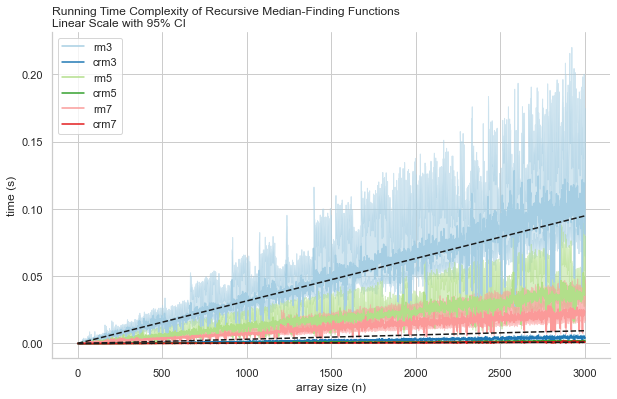

In [21]:
fig, ax = sp.graph(df, figsize=(10,6))
sns.despine(top=True,right=True)

ax.plot(x,fx1, 'k-',linestyle='--')
ax.plot(x,fx2, 'k-',linestyle='--')
ax.plot(x,fx3, 'k-',linestyle='--')

ax.legend(loc ='upper left')

ax.set_xlabel('array size (n)')
ax.set_ylabel('time (s)')
ax.set_title('Running Time Complexity of Recursive Median-Finding Functions\n'+
             'Linear Scale with 95% CI', loc='left')

Text(0.0, 1.0, 'Running Time Complexity of Recursive Median-Finding Functions\nLinear Scale with 95% CI')

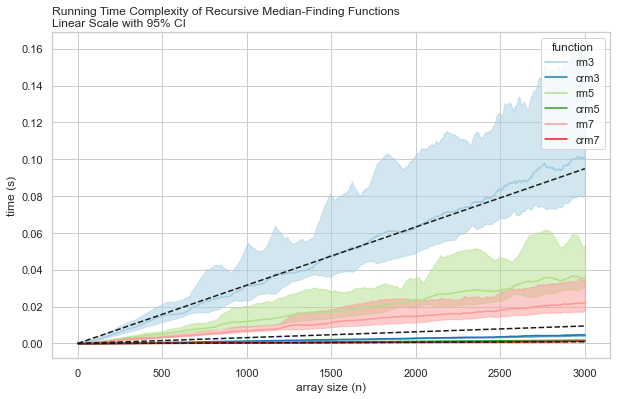

In [22]:
fig, ax = sp.graph(rdf, figsize=(10,6))

ax.plot(x,fx1, 'k-',linestyle='--')
ax.plot(x,fx2, 'k-',linestyle='--')
ax.plot(x,fx3, 'k-',linestyle='--')

ax.set_xlabel('array size (n)')
ax.set_ylabel('time (s)')
ax.set_title('Running Time Complexity of Recursive Median-Finding Functions\n'+
             'Linear Scale with 95% CI', loc='left')

Large variances on `rm3` were observed throughout the process but functions appear to run at linear time complexity $O(n)$. To further illustrate, we would scale the axes to logarithmic scale for better visualization.

Text(0.0, 1.0, 'Running Time Complexity of Recursive Median-Finding Functions\nLog Scale with 95% CI')

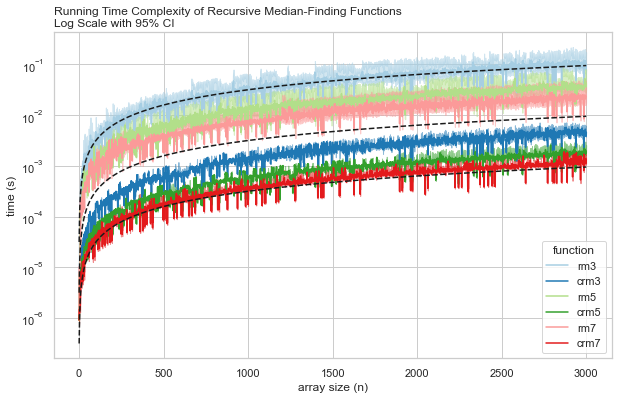

In [23]:
fig, ax = sp.graph(df, figsize=(10,6))

ax.plot(x,fx1, 'k-',linestyle='--')
ax.plot(x,fx2, 'k-',linestyle='--')
ax.plot(x,fx3, 'k-',linestyle='--')

ax.set_yscale('log')

ax.set_xlabel('array size (n)')
ax.set_ylabel('time (s)')
ax.set_title('Running Time Complexity of Recursive Median-Finding Functions\n'+
             'Log Scale with 95% CI', loc='left')

Text(0.0, 1.0, 'Running Time Complexity of Recursive Median-Finding Functions\nLog Scale with 95% CI')

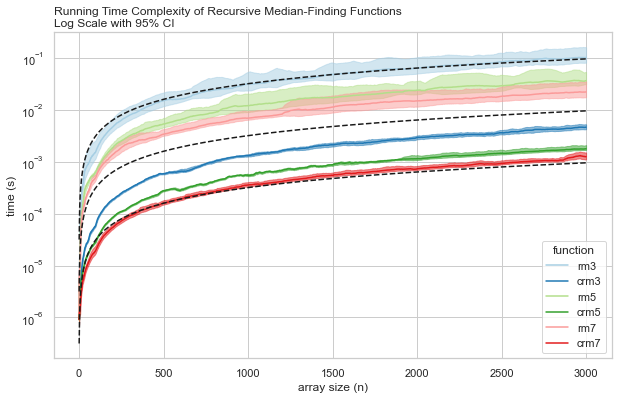

In [24]:
fig, ax = sp.graph(rdf, figsize=(10,6))

ax.plot(x,fx1, 'k-',linestyle='--')
ax.plot(x,fx2, 'k-',linestyle='--')
ax.plot(x,fx3, 'k-',linestyle='--')

ax.set_yscale('log')

ax.set_xlabel('array size (n)')
ax.set_ylabel('time (s)')
ax.set_title('Running Time Complexity of Recursive Median-Finding Functions\n'+
             'Log Scale with 95% CI', loc='left')

Results indicated that the compiled version of the algorithms performs relatively better than the default counterparts, whereas the result correspond to its theoretical aspect where compiled code runs faster than interpreted ones. However, this does not indicate that compiled versions have better complexity than the default versions.

The presence of increasing complexity is quite shown on all of the plots which implies possible $O(n \log n)$ complexity on all functions, but barely shows any significant difference. For that reason, we would futher investigate by scaling the x axis to logarithmic scale to accurately identify the trend of the algorithm complexity.

Text(0.0, 1.0, 'Running Time Complexity of Recursive Median-Finding Functions\nLog-Log Scale with 95% CI')

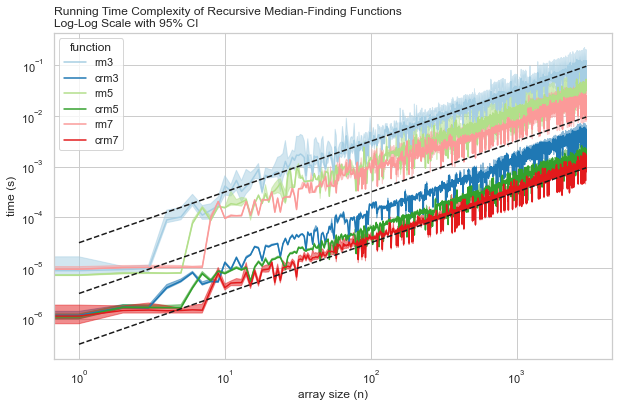

In [25]:
fig, ax = sp.graph(df, figsize=(10,6))

ax.plot(x,fx1, 'k-',linestyle='--')
ax.plot(x,fx2, 'k-',linestyle='--')
ax.plot(x,fx3, 'k-',linestyle='--')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel('array size (n)')
ax.set_ylabel('time (s)')
ax.set_title('Running Time Complexity of Recursive Median-Finding Functions\n'+
             'Log-Log Scale with 95% CI', loc='left')

Text(0.0, 1.0, 'Running Time Complexity of Recursive Median-Finding Functions\nLog-Log Scale with 95% CI')

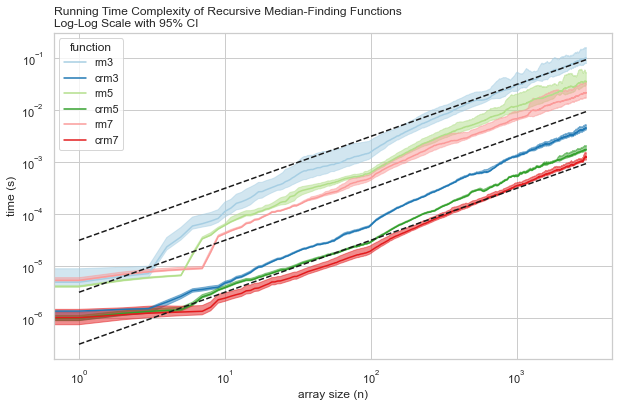

In [26]:
fig, ax = sp.graph(rdf, figsize=(10,6))

ax.plot(x,fx1, 'k-',linestyle='--')
ax.plot(x,fx2, 'k-',linestyle='--')
ax.plot(x,fx3, 'k-',linestyle='--')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel('array size (n)')
ax.set_ylabel('time (s)')
ax.set_title('Running Time Complexity of Recursive Median-Finding Functions\n'+
             'Log-Log Scale with 95% CI', loc='left')

From the given plots shown above, the "slope" of `rm3` and `crm3` in the logarithmic scale is visually higher than the sample linear functions (given in dashed lines) while the rest of the functions converge their slopes parallel to the sample linear functions. This indicates that the complexity of `rm3` and `crm3` has a higher complexity than $O(n)$ while the rest of the functions have $O(n)$ complexity. However, with the limited array size analyzed, the convergence of these time complexities was barely visualized.

## Conclusion

Recursive median-finding functions are a viable tool for estimating medians across large array sizes. Compiled versions of the algorithm would recommend faster but linear improvements on the running time of the algorithm. Implementation of other number of elements per group is recommended for analysis in future researches.

As shown from the results presented, the recursive method of median-finding algorithm is feasible with some reservations. Though the running time of $O(n)$ would be significant for cases that prefer speed over accuracy, it is not recommended for statistical purposes given its condition in the case of a even-numbered array length.

Another issue is the limitation of the sample size which only revolves on `Int8` integers where its implementation to real-world data could potentially be slower than the shown analysis. Analysis recommends integration of higher integer data types and comparison of its complexities between data types.

Finally, the direction of the complexity is unclear at 3000 points where possible discrepancies on the interpretation is iminent. Research recommends further analysis beyond the given size.